In [1]:
import pandas as pd

In [2]:
covid = pd.read_csv("C:/Users/Erkut/Desktop/tez uygulama/covid1.csv")
df = covid.copy()
df.head()

,sex,patient_type,entry_date,date_symptoms,date_died,age,covid_res,intubed,pneumonia,pregnancy,...,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,icu
0,Male,Outpatient,04-05-2020,02-05-2020,9999-99-99,27,Positive,NaN,No,NaN,...,No,No,No,No,No,No,No,No,No,NaN
1,Male,Outpatient,19-03-2020,17-03-2020,9999-99-99,24,Positive,NaN,No,NaN,...,No,No,No,No,No,No,No,No,NaN,NaN
2,Female,Inpatient,06-04-2020,01-04-2020,9999-99-99,54,Positive,No,No,No,...,No,No,No,No,No,Yes,No,No,NaN,No
3,Male,Inpatient,17-04-2020,10-04-2020,9999-99-99,30,Positive,No,Yes,NaN,...,No,No,No,No,No,No,No,No,NaN,No
4,Female,Inpatient,13-04-2020,13-04-2020,22-04-2020,60,Positive,No,No,No,...,No,No,Yes,No,Yes,No,No,No,NaN,No


### Data Preprocessing

In [3]:
df.drop(["date_symptoms"], axis = 1, inplace = True)

In [4]:
df.drop(["date_died"], axis = 1, inplace = True)

In [5]:
df.drop(["entry_date"], axis = 1, inplace = True)

In [6]:
df.head()

,sex,patient_type,age,covid_res,intubed,pneumonia,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,icu
0,Male,Outpatient,27,Positive,NaN,No,NaN,No,No,No,No,No,No,No,No,No,No,No,NaN
1,Male,Outpatient,24,Positive,NaN,No,NaN,No,No,No,No,No,No,No,No,No,No,NaN,NaN
2,Female,Inpatient,54,Positive,No,No,No,No,No,No,No,No,No,No,Yes,No,No,NaN,No
3,Male,Inpatient,30,Positive,No,Yes,NaN,No,No,No,No,No,No,No,No,No,No,NaN,No
4,Female,Inpatient,60,Positive,No,No,No,Yes,No,No,No,Yes,No,Yes,No,No,No,NaN,No


In [7]:
df.isnull().sum()

sex                         0
patient_type                0
age                         0
covid_res                   0
intubed                444813
pneumonia                  11
pregnancy              288699
diabetes                 1981
copd                     1749
asthma                   1752
inmsupr                  1980
hypertension             1824
other_disease            2598
cardiovascular           1822
obesity                  1781
renal_chronic            1792
tobacco                  1907
contact_other_covid    175031
icu                    444814
dtype: int64

In [8]:
df.dropna(inplace = True)

In [9]:
df.isnull().sum()

sex                    0
patient_type           0
age                    0
covid_res              0
intubed                0
pneumonia              0
pregnancy              0
diabetes               0
copd                   0
asthma                 0
inmsupr                0
hypertension           0
other_disease          0
cardiovascular         0
obesity                0
renal_chronic          0
tobacco                0
contact_other_covid    0
icu                    0
dtype: int64

### Label Encoder and One Hot Encoding

In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
binary_cat_columns = ['sex', 'patient_type', 'intubed', 'pneumonia', 'pregnancy', 'diabetes', 'copd', 'asthma', 'inmsupr', 'hypertension',
                      'other_disease', 'cardiovascular', 'obesity', 'renal_chronic', 'tobacco', 'contact_other_covid', 'icu']

In [12]:
lbe = LabelEncoder()

In [13]:
for col in binary_cat_columns:
    df[col] = lbe.fit_transform(df[col])

In [14]:
nominal_cat_columns = ['covid_res']

In [15]:
for col in nominal_cat_columns:
    df= pd.get_dummies(df, columns = [col], drop_first = True)

In [16]:
df.head()

,sex,patient_type,age,intubed,pneumonia,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,icu,covid_res_Negative,covid_res_Positive
21,0,0,25,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
30,0,0,52,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,1
71,0,0,51,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
79,0,0,67,1,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1
93,0,0,59,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1


In [17]:
import seaborn as sns

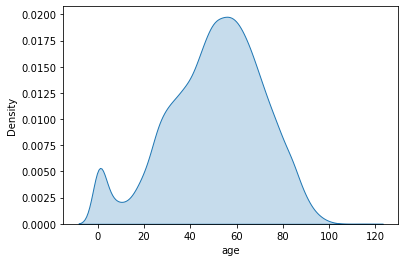

In [18]:
sns.kdeplot(df.age, shade = True);

### Normalization

In [19]:
min_max_columns = ['age']

# min-max scaler ile ölçeklendirme işlemi
for column in min_max_columns:
        # sütunun minimum değeri
        min_column = df[column].min()
        # sütunun maksimum değeri
        max_column = df[column].max()
        # min max scaler
        df[column] = (df[column] - min_column) / (max_column - min_column)

In [20]:
df.icu.value_counts()

0    20460
1     2698
Name: icu, dtype: int64

In [21]:
import matplotlib.pyplot as plt

C:\Users\Erkut\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


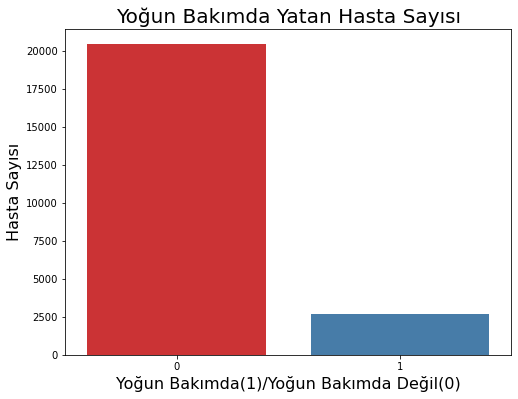

In [22]:
plt.figure(figsize=(8,6))
sns.countplot(df.icu, palette='Set1')
plt.title('Yoğun Bakımda Yatan Hasta Sayısı',fontsize=20)
plt.xlabel('Yoğun Bakımda(1)/Yoğun Bakımda Değil(0)', fontsize=16)
plt.ylabel('Hasta Sayısı', fontsize=16);

### GBM Model - Prediction - Tuning

In [23]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve

In [24]:
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [25]:
y = df["icu"]
X = df.drop(['icu'], axis=1)
X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [26]:
gbm_model = GradientBoostingClassifier().fit(X_train, y_train)

### GBM Test Accuracy Score

In [27]:
y_pred = gbm_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.8907599309153713

### GBM Train Accuracy Score

In [28]:
accuracy_score(y_train, gbm_model.predict(X_train))

0.8963602714373843

In [29]:
gbm_acc_score = accuracy_score(y_test, y_pred)

In [30]:
gbm_model_conf_matrix = confusion_matrix(y_test, y_pred)

### GBM Confusion Matrix

In [31]:
print("confussion matrix")
print(gbm_model_conf_matrix)
print("\n")
print("Accuracy of RFClassifier:",gbm_acc_score*100,'\n')
print(classification_report(y_test,y_pred))

confussion matrix
[[5996  149]
 [ 610  193]]


Accuracy of RFClassifier: 89.07599309153713 

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      6145
           1       0.56      0.24      0.34       803

    accuracy                           0.89      6948
   macro avg       0.74      0.61      0.64      6948
weighted avg       0.87      0.89      0.87      6948



### GBM Training Error

In [32]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import validation_curve
import matplotlib.pyplot as plt

In [33]:
gbm_training_error = mean_absolute_error(y_train,  gbm_model.predict(X_train))

In [34]:
print(gbm_training_error)

0.10363972856261566


### GBM Testing Error

In [35]:
gbm_testing_error = mean_absolute_error(y_test, y_pred)

In [36]:
print(gbm_training_error)

0.10363972856261566


### Validation Curve for n_estimators

In [52]:
from sklearn.model_selection import validation_curve
import numpy as np

In [53]:
param_range = np.arange(1, 150, 2)

In [54]:
train_scores, test_scores = validation_curve(GradientBoostingClassifier(),
                                  X, y, param_name="n_estimators", param_range=param_range,
                                  cv=4, scoring="accuracy", n_jobs=-1)

In [55]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

In [56]:
import matplotlib.pyplot as plt

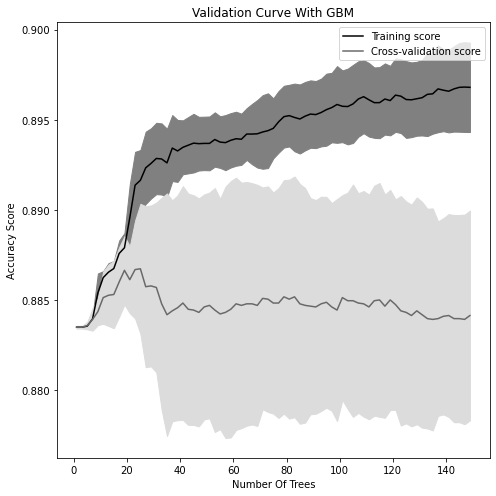

In [57]:
plt.subplots(1, figsize=(7,7))
plt.plot(param_range, train_mean, label="Training score", color="black")
plt.plot(param_range, test_mean, label="Cross-validation score", color="dimgrey")

plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="gray")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="gainsboro")
 
plt.title("Validation Curve With GBM")
plt.xlabel("Number Of Trees")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()

In [40]:
from sklearn.model_selection import RandomizedSearchCV

In [37]:
gbm_params = {
                'max_depth' : [2, 3, 4, 5, 9, 10, 15, 20, 25, 35],
                'min_samples_leaf' : [1, 3, 2, 4, 5],
                'min_samples_split' : [2, 3, 4, 5, 10]}

In [38]:
gbm = GradientBoostingClassifier()

In [41]:
gbm_cv_model = RandomizedSearchCV(gbm, gbm_params, 
                             cv = 5, 
                             n_jobs = -1, 
                             verbose = 2)

In [ ]:
gbm_cv_model.fit(X_train, y_train)

In [43]:
gbm_cv_model.best_params_

{'min_samples_split': 5, 'min_samples_leaf': 3, 'max_depth': 4}

In [44]:
gbm_tune = GradientBoostingClassifier(max_depth = 4,
                       min_samples_split = 5,
                       min_samples_leaf = 1)

In [45]:
gbm_tuned = gbm_tune.fit(X_train,y_train)

In [46]:
y_pred = gbm_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.8898963730569949

In [47]:
gbm_acc_score_tuned = accuracy_score(y_test, y_pred);

In [48]:
gbm_model_conf_matrix_tuned = confusion_matrix(y_test, y_pred)

### GBM TUNED Confussion Matrix

In [50]:
print("confussion matrix")
print(gbm_model_conf_matrix_tuned)
print("\n")
print("Accuracy of GBMClassifier_tuned:",gbm_acc_score_tuned*100,'\n')
print(classification_report(y_test,y_pred))

confussion matrix
[[5974  171]
 [ 594  209]]


Accuracy of GBMClassifier_tuned: 88.98963730569949 

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      6145
           1       0.55      0.26      0.35       803

    accuracy                           0.89      6948
   macro avg       0.73      0.62      0.65      6948
weighted avg       0.87      0.89      0.87      6948



### LIGHT GBM

In [51]:
lgbm_model = LGBMClassifier().fit(X_train, y_train)

In [52]:
y_pred = lgbm_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.8937823834196891

In [53]:
lgbm_params = {
        'n_estimators': [50, 70, 100, 150, 200, 250, 500],
        'subsample': [0.6, 0.8, 1.0],
        'max_depth': [2, 3, 4, 5, 9, 10, 15, 20, 25, 35],
        'learning_rate': [0.01, 0.05, 0.1, 0.5, 1],
        'num_leaves': [2, 4, 6, 8, 10, 16, 32]}

In [54]:
lgbm = LGBMClassifier()

lgbm_cv_model = RandomizedSearchCV(lgbm, lgbm_params, 
                             cv = 10, 
                             n_jobs = -1, 
                             verbose = 2)

In [55]:
lgbm_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=LGBMClassifier(), n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1, 0.5,
                                                          1],
                                        'max_depth': [2, 3, 4, 5, 9, 10, 15, 20,
                                                      25, 35],
                                        'n_estimators': [50, 70, 100, 150, 200,
                                                         250, 500],
                                        'num_leaves': [2, 4, 6, 8, 10, 16, 32],
                                        'subsample': [0.6, 0.8, 1.0]},
                   verbose=2)

In [56]:
lgbm_cv_model.best_params_

{'subsample': 1.0,
 'num_leaves': 32,
 'n_estimators': 50,
 'max_depth': 35,
 'learning_rate': 0.05}

In [57]:
lgbm_tune = LGBMClassifier(learning_rate = 0.05, 
                       max_depth = 35,
                       subsample = 1,
                       n_estimators = 50,
                       num_leaves= 32);

In [58]:
lgbm_tuned = lgbm_tune.fit(X_train,y_train)

In [60]:
y_pred = lgbm_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.8898963730569949

### XGBOOST

In [62]:
xgb_model = XGBClassifier().fit(X_train, y_train)

[23:33:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [63]:
y_pred = xgb_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.8917674150834772

In [64]:
xgbm_params = {
        'n_estimators': [50, 70, 100, 150, 200, 250, 500],
        'max_depth': [2, 3, 4, 5, 9, 10, 15, 20, 25, 35],
        'gamma' : [0.5, 1, 1.5, 2, 5]}

In [65]:
xgbm = XGBClassifier()

xgbm_cv_model = RandomizedSearchCV(xgbm, xgbm_params, 
                             cv = 10, 
                             n_jobs = -1, 
                             verbose = 2)

In [66]:
xgbm_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


C:\Users\Erkut\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:35:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=10,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           enable_categorical=False, gamma=None,
                                           gpu_id=None, importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraint...
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                        

In [67]:
xgbm_cv_model.best_params_

{'n_estimators': 150, 'max_depth': 4, 'gamma': 5}

In [68]:
xgbm_tune = XGBClassifier(max_depth = 4,
                       gamma = 5,
                       n_estimators = 150)

In [71]:
xgbm_tuned = xgbm_tune.fit(X_train,y_train)

C:\Users\Erkut\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:36:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [72]:
y_pred = xgbm_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.8893206678180772

### Super Learner Application

In [73]:
from mlxtend.classifier import StackingCVClassifier

In [75]:
y = df["icu"]
X = df.drop(['icu'], axis=1)
X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [76]:
classifier1 = GradientBoostingClassifier(max_depth = 4,
                       min_samples_split = 5,
                       min_samples_leaf = 1)

In [77]:
classifier2 = XGBClassifier(max_depth = 4,
                       gamma = 5,
                       n_estimators = 150)

In [78]:
classifier3 = LGBMClassifier(learning_rate = 0.1, 
                       max_depth = 10,
                       subsample = 0.6,
                       n_estimators = 500,
                       num_leaves= 32)

In [79]:
sclf = StackingCVClassifier(classifiers = [classifier1,classifier2],
                            shuffle = False,
                            use_probas = True,
                            cv = 10,
                            meta_classifier =classifier3)

In [80]:
sclf.fit(X_train,y_train)

C:\Users\Erkut\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:38:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Erkut\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:38:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Erkut\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:38:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Erkut\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:38:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Erkut\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:38:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Erkut\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:38:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Erkut\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:38:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Erkut\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:38:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Erkut\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:38:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Erkut\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:38:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Erkut\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:38:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


StackingCVClassifier(classifiers=[GradientBoostingClassifier(max_depth=4,
                                                             min_samples_split=5),
                                  XGBClassifier(base_score=None, booster=None,
                                                colsample_bylevel=None,
                                                colsample_bynode=None,
                                                colsample_bytree=None,
                                                enable_categorical=False,
                                                gamma=5, gpu_id=None,
                                                importance_type=None,
                                                interaction_constraints=None,
                                                learning_rate=None,
                                                max_delta_step=None,
                                                max_depth=4,...
                                                monotone_

In [81]:
y_pred = sclf.predict(X_test)

In [82]:
sclf_conf_matrix = confusion_matrix(y_test, y_pred)

In [83]:
sclf_acc_score = accuracy_score(y_test, y_pred)

In [84]:
print("confussion matrix")
print(sclf_conf_matrix)
print("\n")
print("Accuracy of StackingCVClassifier:",sclf_acc_score*100,'\n')
print(classification_report(y_test,y_pred))

confussion matrix
[[5918  227]
 [ 585  218]]


Accuracy of StackingCVClassifier: 88.31318364997122 

              precision    recall  f1-score   support

           0       0.91      0.96      0.94      6145
           1       0.49      0.27      0.35       803

    accuracy                           0.88      6948
   macro avg       0.70      0.62      0.64      6948
weighted avg       0.86      0.88      0.87      6948



### Super Learner 10 Fold CV

In [85]:
from sklearn.model_selection import cross_validate

In [91]:
scores = cross_validate(sclf, X_train, y_train, cv=10, scoring='accuracy', return_train_score=True, n_jobs = -1)

In [92]:
print(scores["train_score"])

[0.88436493 0.88717527 0.87847008 0.88840908 0.88176023 0.88299404
 0.88045788 0.86887381 0.88422784 0.88224004]


In [93]:
print(scores["test_score"])

[0.8827884  0.87476866 0.86674892 0.88648982 0.87230105 0.88710672
 0.88402221 0.86983344 0.87168415 0.88402221]
